In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
import glob

In [ ]:
files = glob.glob('/content/drive/MyDrive/machine learning/machine learning/*.csv')
for file in files:
    print(file)

In [ ]:
file_path = '/content/drive/MyDrive/machine learning/BankNote_Authentication.csv'
df = pd.read_csv(file_path)

In [ ]:
X = df.drop('class', axis=1).values
y = df['class'].values


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [ ]:
mlp = MLPClassifier(
    hidden_layer_sizes=(10, 10),
    activation='relu',
    solver='adam',
    learning_rate_init=0.001,
    max_iter=500,
    early_stopping=True,
    validation_fraction=0.1,
    random_state=42
)
mlp.fit(X_train, y_train)


MLPClassifier(early_stopping=True, hidden_layer_sizes=(10, 10), max_iter=500,
              random_state=42)

In [ ]:
y_pred = mlp.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

Confusion Matrix:
 [[147   1]
 [ 26 101]]


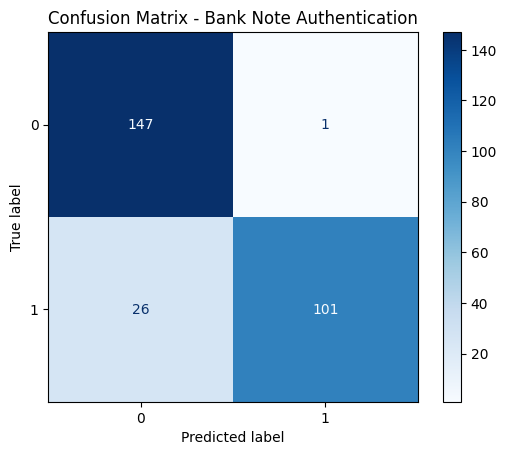

In [ ]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix - Bank Note Authentication")
plt.show()

In [ ]:
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))


Classification Report:

              precision    recall  f1-score   support

           0       0.85      0.99      0.92       148
           1       0.99      0.80      0.88       127

    accuracy                           0.90       275
   macro avg       0.92      0.89      0.90       275
weighted avg       0.91      0.90      0.90       275



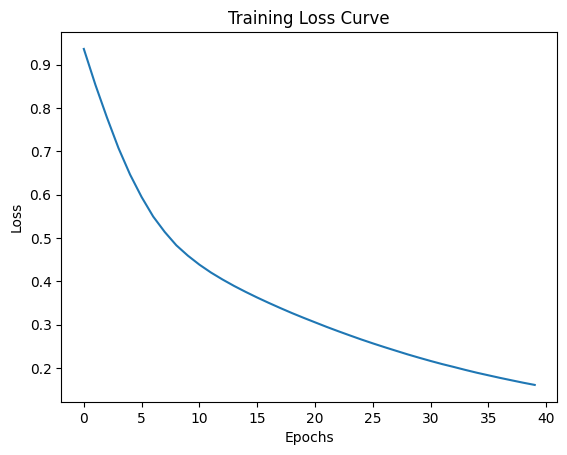

In [ ]:
plt.plot(mlp.loss_curve_)
plt.title("Training Loss Curve")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()

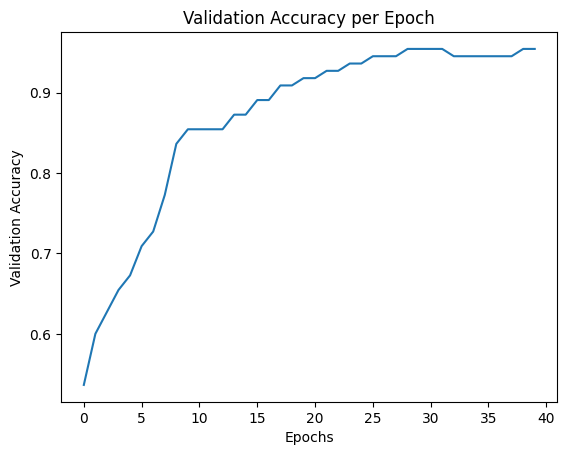

In [ ]:
if hasattr(mlp, 'validation_scores_'):
    plt.plot(mlp.validation_scores_)
    plt.title("Validation Accuracy per Epoch")
    plt.xlabel("Epochs")
    plt.ylabel("Validation Accuracy")
    plt.show()